## Setup

In [19]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 4.5, scipen = 999)

In [2]:
theme_set(theme_bw())

In [3]:
data(midwest, package = "ggplot2")
head(midwest)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


## Base plot

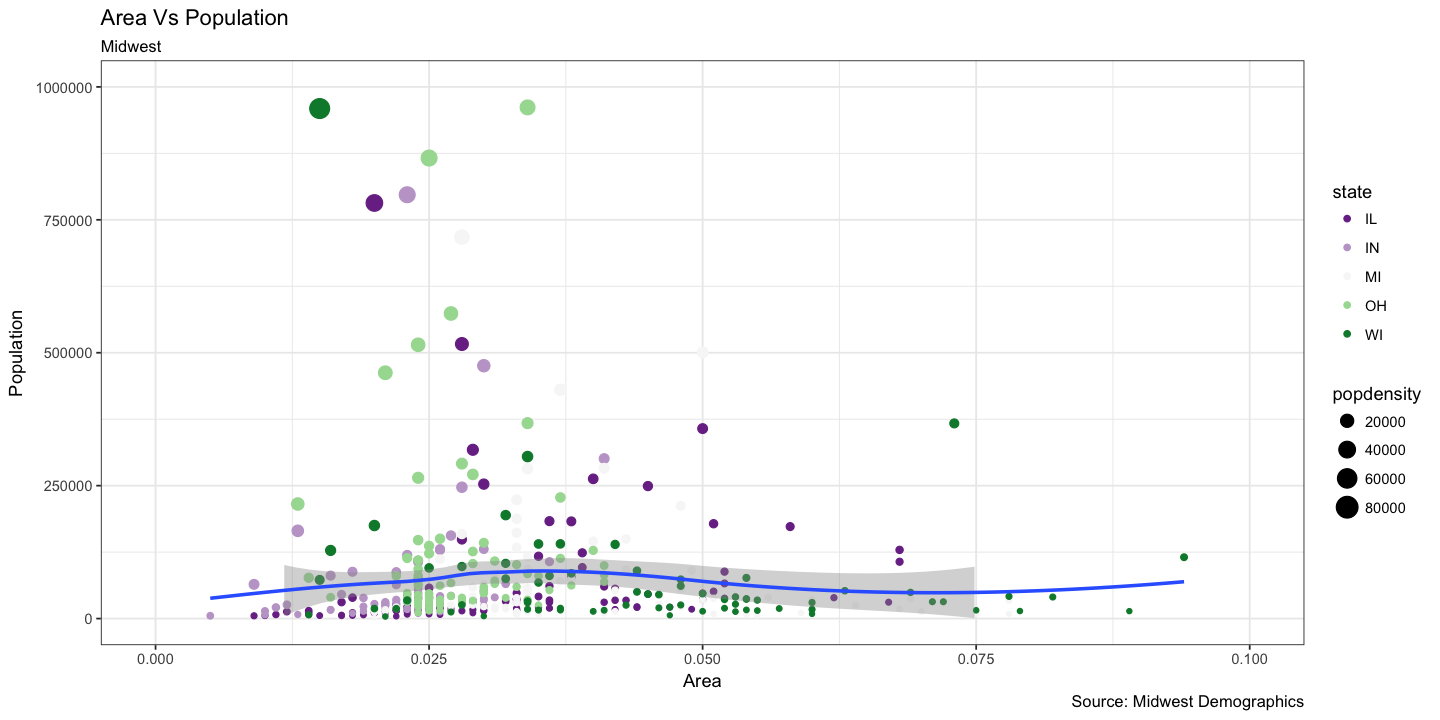

In [49]:
gg <- ggplot(midwest, aes(x = area, y = poptotal)) + 
    geom_point(aes(color = state, size = popdensity)) + 
    geom_smooth(method = "loess") + ylim(c(0, 1000000)) + xlim(c(0, .1)) +
    scale_colour_brewer(palette = 'PRGn') +
    labs(title = "Area Vs Population", subtitle="Midwest", caption = "Source: Midwest Demographics", x = "Area", y = "Population")
gg

# Theme
要客製化一 plot 資料以外的顯示設定，主要都是透過 `theme()` 的參數調整。
而參數通常是經過 `element_type()` 產生的參數，而非直接丟字串進去。

主要有以下四種參數：
- element_text(): Since the title, subtitle and captions are textual items, element_text() function is used to set it.
- element_line(): Likewise element_line() is use to modify line based components such as the axis lines, major and minor grid lines, etc.
- element_rect(): Modifies rectangle components such as plot and panel background.
- element_blank(): Turns off displaying the theme item.

## 改變 plot / axis 文字 style
- 主要針對 `plot.` 以及 `axis.` 底下的 elements 做操作，然後因為是文字所以都是透過 `element_text`
- `element_text` 常見參數
    * size
    * color
    * family
    * hjust: 水平調整，設定成 0.5 = center
    * vjust: 文字跟其他 element 之間的垂直空間 
    * angle

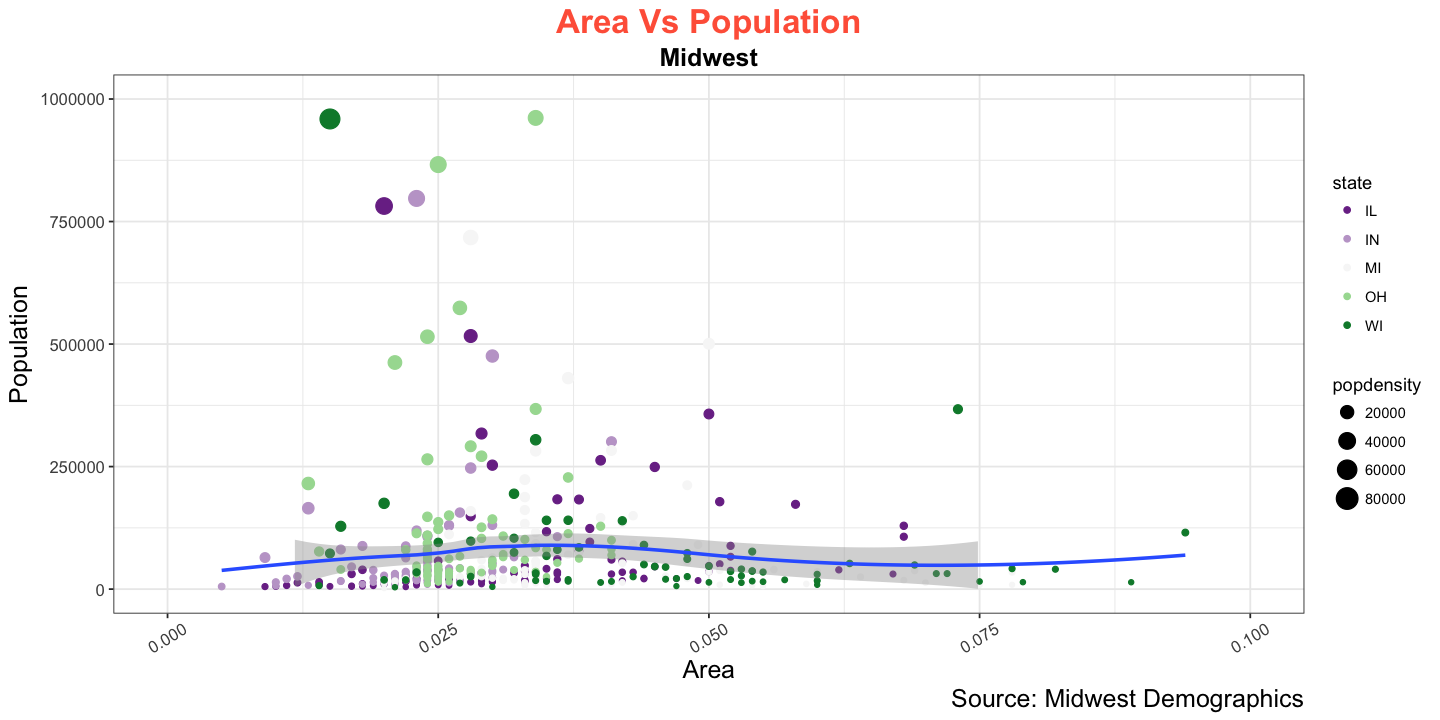

In [50]:
gg + theme(plot.title=element_text(size=20, 
                                    face="bold", 
                                    color="tomato",
                                    hjust=0.5,
                                    lineheight=1.2),  # title
            plot.subtitle=element_text(size=15, 
                                       face="bold",
                                       hjust=0.5),  # subtitle
            plot.caption=element_text(size=15),  # caption
            axis.title.x=element_text(vjust=10,  
                                      size=15),  # X axis title
            axis.title.y=element_text(size=15),  # Y axis title
            axis.text.x=element_text(size=10, 
                                     angle = 30,
                                     vjust=.5),  # X axis text
            axis.text.y=element_text(size=10))  # Y axis text

## 修改 Legend

當我們使用讓某 geom 的 aesthetics（shape, color, fill ..）依照某個變數做改變的時候，legend 就會自動產生。

In [61]:
library(gridExtra)
options(repr.plot.width=12, repr.plot.height=6)

### 有三種方式可以改 legend 標題
1. `labs`: 依照 legend 是依照什麼 aes 產生的就直接設定名稱
2. `guides`: 還可以改變多個 Legend 之間的顯示順序
3. `scale_aesthetic_vartype()`: 有多個 legends 時可以個別設定要顯示哪個 (`guide=FALSE`)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


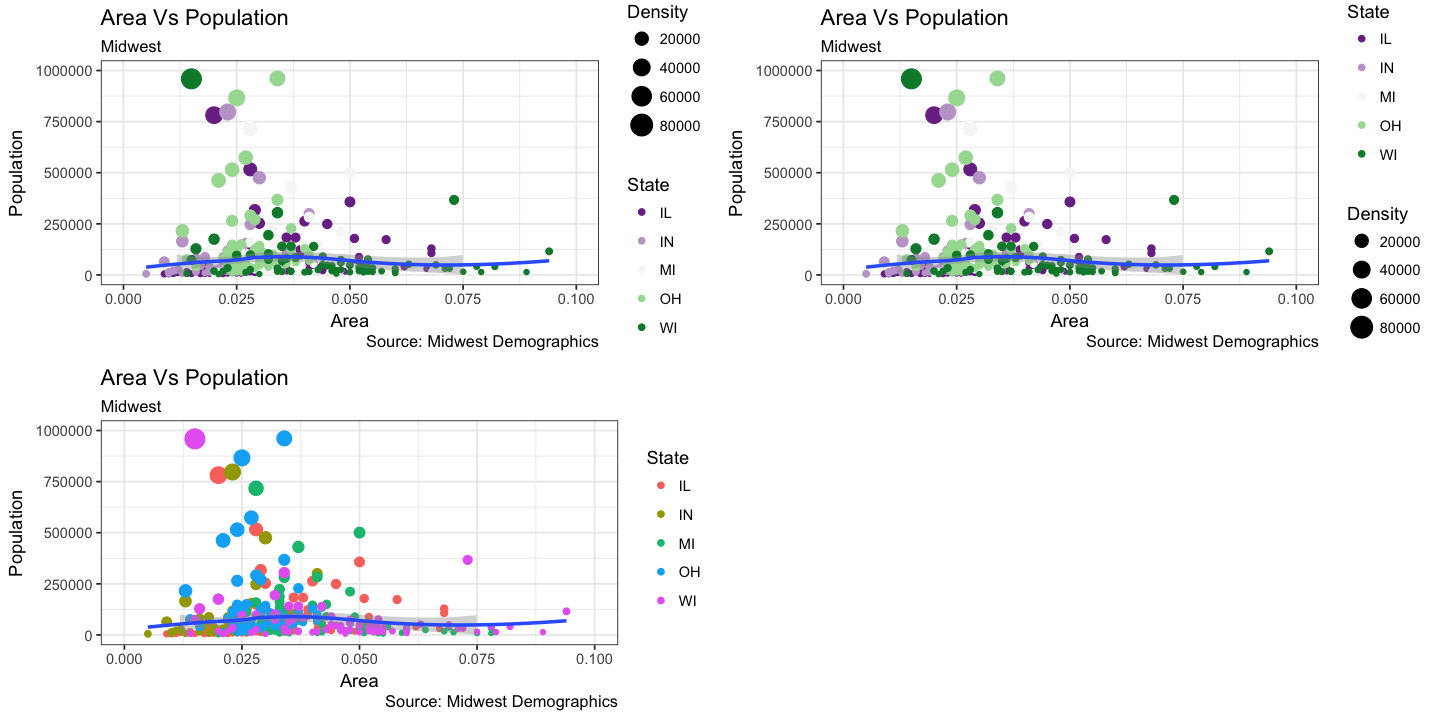

In [63]:
options(warn=-1)
gg1 <- gg + labs(color="State", size="Density")
gg2 <- gg + guides(color=guide_legend("State", order=1), size=guide_legend("Density", order=2))
gg3 <- gg + scale_color_discrete(name="State") + scale_size_continuous(name = "Density", guide = FALSE)
grid.arrange(gg1, gg2, gg3, ncol=2)

### 改變 Legend 內標籤顏色/文字
使用 `scale_aesthetic_manual()`

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


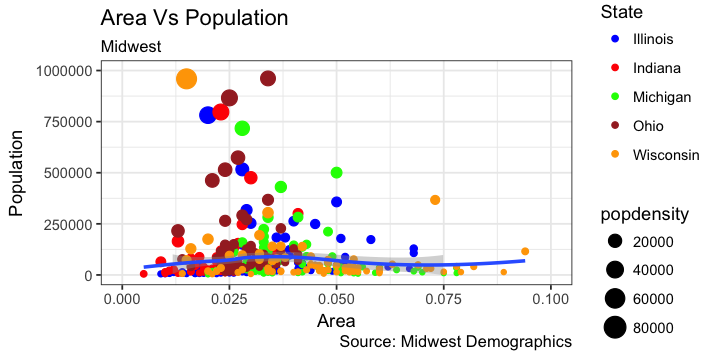

In [65]:
options(repr.plot.width=6, repr.plot.height=3)
gg + scale_color_manual(name="State", 
                        labels = c("Illinois", 
                                   "Indiana", 
                                   "Michigan", 
                                   "Ohio", 
                                   "Wisconsin"), 
                        values = c("IL"="blue", 
                                   "IN"="red", 
                                   "MI"="green", 
                                   "OH"="brown", 
                                   "WI"="orange"))

### 改變多個 Legends 的顯示順序
使用 `guides`

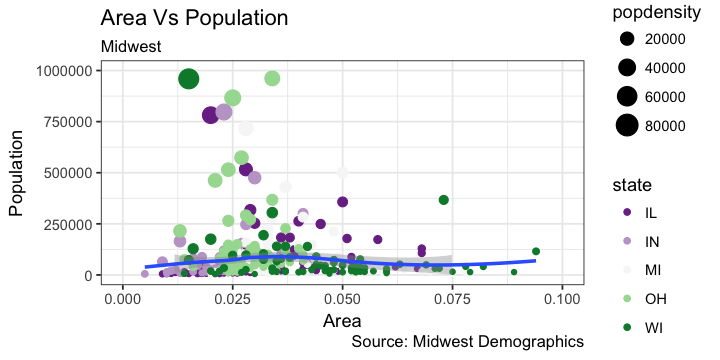

In [66]:
gg + guides(colour = guide_legend(order = 2),
            size = guide_legend(order = 1))

### Legend Style
- Legend 標題字體大小 / 顏色
- Legend 背景填滿
- legend 內標籤大小

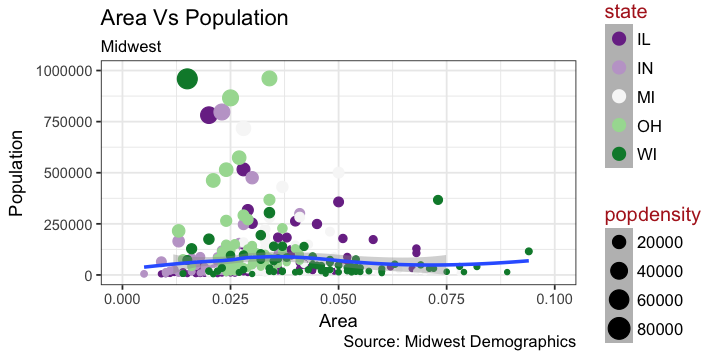

In [77]:
gg + theme(legend.title = element_text(size=12, color = "firebrick"), 
           legend.text = element_text(size=10),
           legend.key=element_rect(fill='grey')) + 
  guides(colour = guide_legend(override.aes = list(size=2, stroke=1.5))) 

### 改變 Legend 位置
The `legend.position` is the x and y axis position in chart area, where (0,0) is bottom left of the chart and (1,1) is top right.

In [83]:
options(repr.plot.width=12, repr.plot.height=9)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


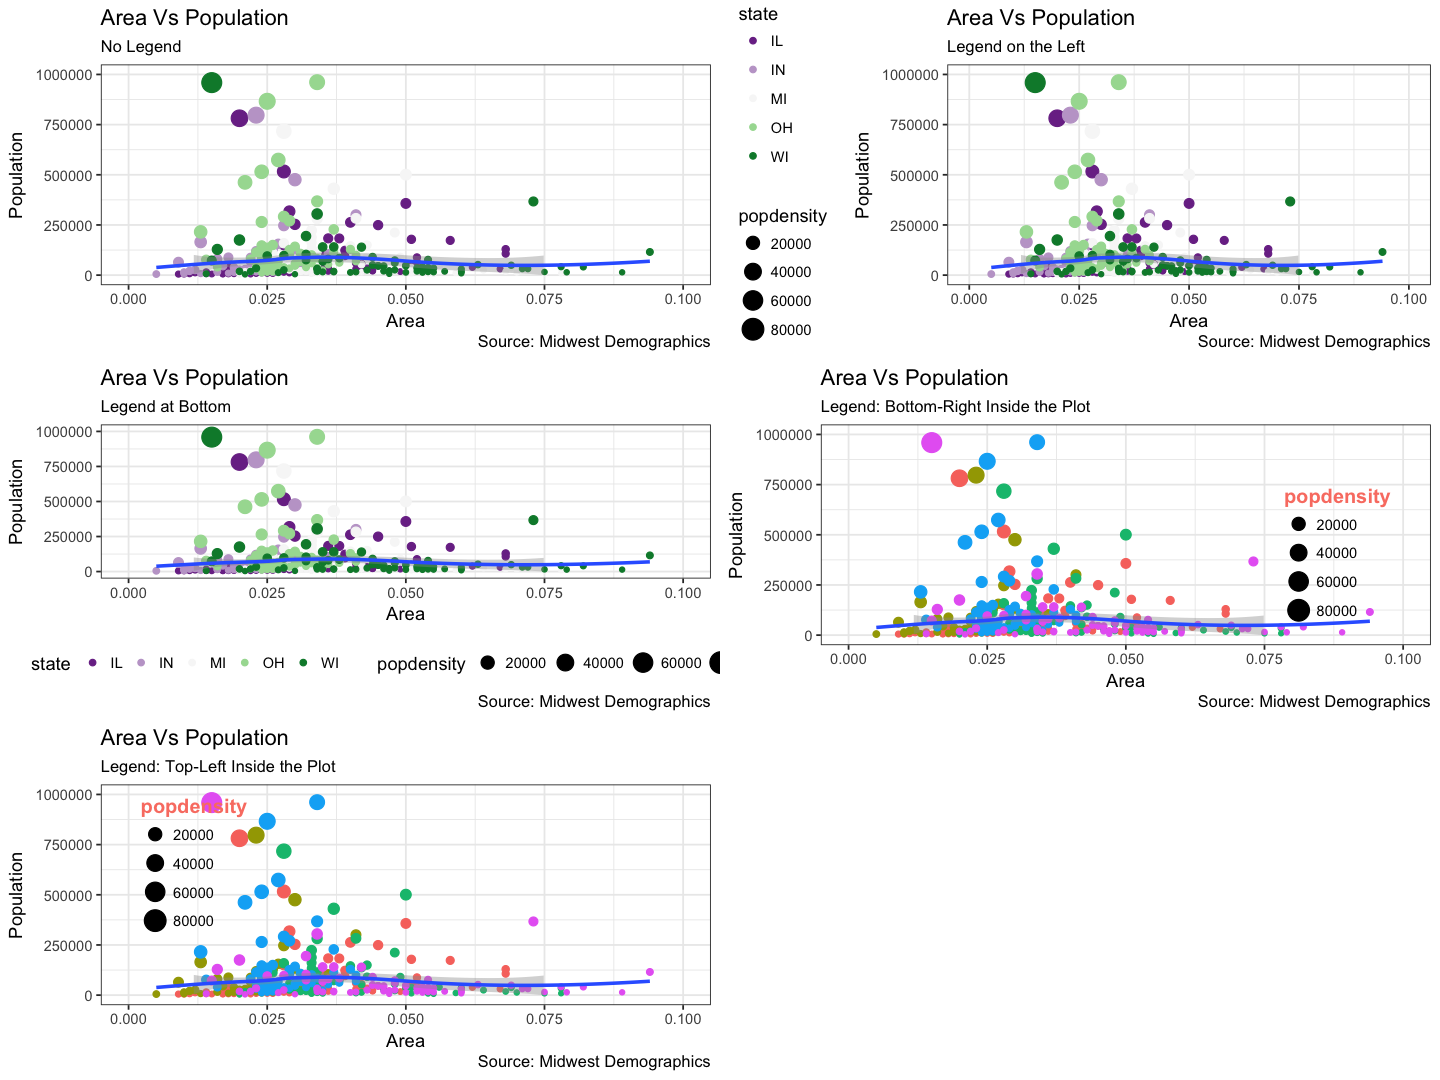

In [90]:
grid.arrange(
    gg + theme(legend.position="None") + labs(subtitle="No Legend"),
    gg + theme(legend.position="left") + labs(subtitle="Legend on the Left"),
    gg + theme(legend.position="bottom", legend.box = "horizontal") + labs(subtitle="Legend at Bottom"),
    gg + theme(legend.title = element_text(size=12, color = "salmon", face="bold"),
           legend.justification=c(1,0), 
           legend.position=c(0.95, 0.05),  
           legend.background = element_blank(),
           legend.key = element_blank()) + labs(subtitle="Legend: Bottom-Right Inside the Plot") +
         scale_color_discrete(guide=FALSE),
    gg + theme(legend.title = element_text(size=12, color = "salmon", face="bold"),
           legend.justification=c(0,1), 
           legend.position=c(0.05, 0.98),
           legend.background = element_blank(),
           legend.key = element_blank()) + labs(subtitle="Legend: Top-Left Inside the Plot") +
         scale_color_discrete(guide=FALSE)
, ncol=2)

## Text, Label, Annotation


通常有以下幾種方法可以直接在圖上加字 / 標籤：
- text:
    - ggplot2::geom_text
    - ggrepel::geom_text_repel
- label:
    - ggplot2::geom_label
    - ggrepel::geom_label_repel
    
字跟標籤的差異在於 label 有邊框；而使用 ``ggrepel`` package 產生的字與標籤不會跟點重複


### 選擇畫 text / label 的點
首先依照某條件設定新 variable `large_county` 的值，之後用來篩選要標記文字的點

In [91]:
midwest_sub <- midwest[midwest$poptotal > 300000, ]
midwest_sub$large_county <- ifelse(midwest_sub$poptotal > 300000, midwest_sub$county, "")


In [108]:
options(repr.plot.width=6, repr.plot.height=4)

### 基本圖

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


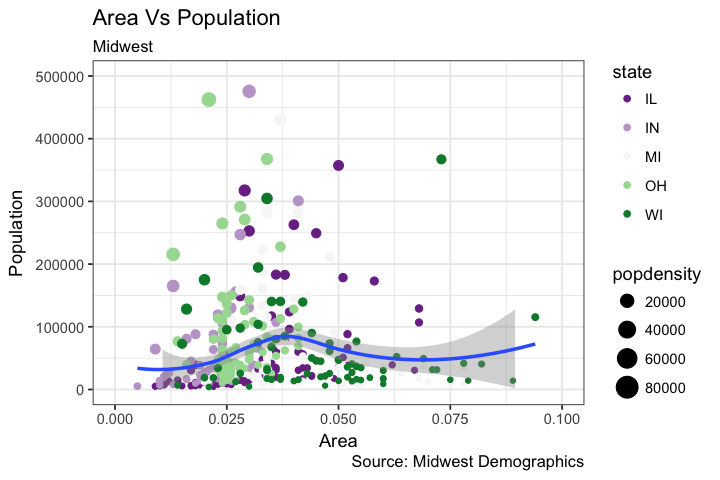

In [109]:
gg <- gg + ylim(c(0, 500000))
gg

### 使用原生 ggplot 為點增加文字 / 標籤
指定剛剛符合條件的 subset (`midwest_sub`) 裡的某個儲存 text 的 variable 標記 (`large_county`)

注意文字跟標籤都是直接蓋在點上面

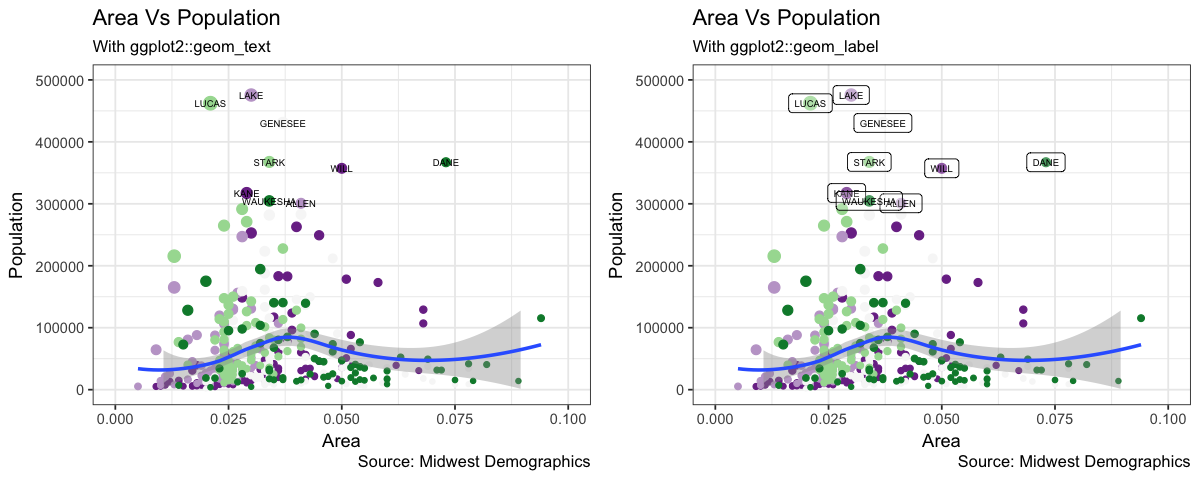

In [111]:
options(repr.plot.width=10, repr.plot.height=4)
gg1 <- gg + geom_text(aes(label=large_county), size=2, data=midwest_sub) + 
    labs(subtitle="With ggplot2::geom_text") + theme(legend.position = "None")   # text
gg2 <- gg + geom_label(aes(label=large_county), size=2, data=midwest_sub, alpha=0.25) + 
    labs(subtitle="With ggplot2::geom_label") + theme(legend.position = "None")  # label
grid.arrange(gg1, gg2, ncol=2)

### 使用 ggrepel package 為點增加文字 / 標籤
- geom_text_repel
- geom_label_repel

In [106]:
install.packages("ggrepel")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


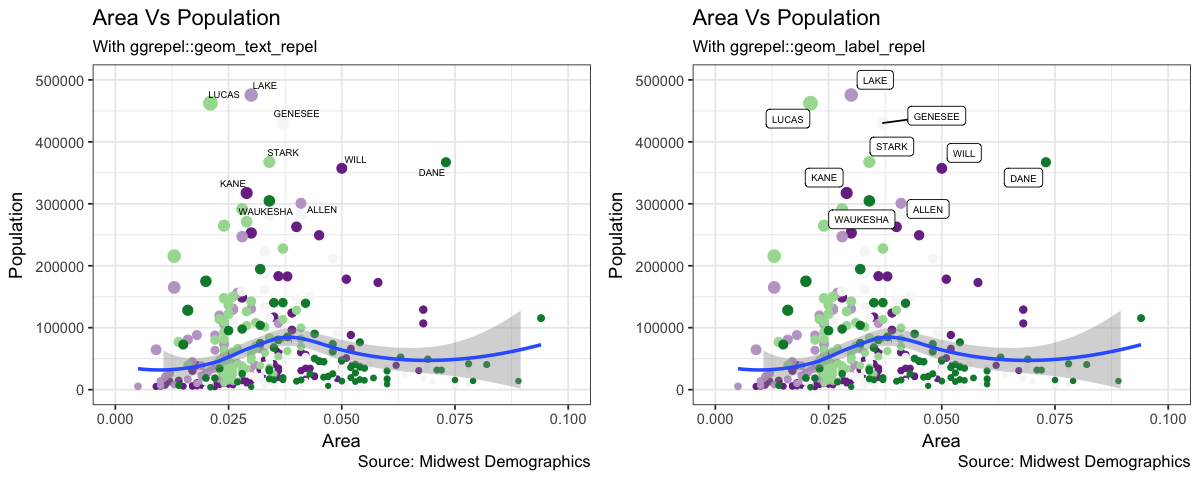

In [112]:
library(ggrepel)

gg1 <- gg + geom_text_repel(aes(label=large_county), size=2, data=midwest_sub) + 
    labs(subtitle="With ggrepel::geom_text_repel") + theme(legend.position = "None")   # text

gg2 <- gg + geom_label_repel(aes(label=large_county), size=2, data=midwest_sub) + 
    labs(subtitle="With ggrepel::geom_label_repel") + theme(legend.position = "None")   # label

grid.arrange(gg1, gg2, ncol=2)

### 在圖上任意位置加文字
利用 `grid` package 建立一個 `grob` (graphcial object) 然後當作 `annonation_custom` 的參數

In [126]:
options(repr.plot.width=6, repr.plot.height=4)

In [128]:
library(grid)

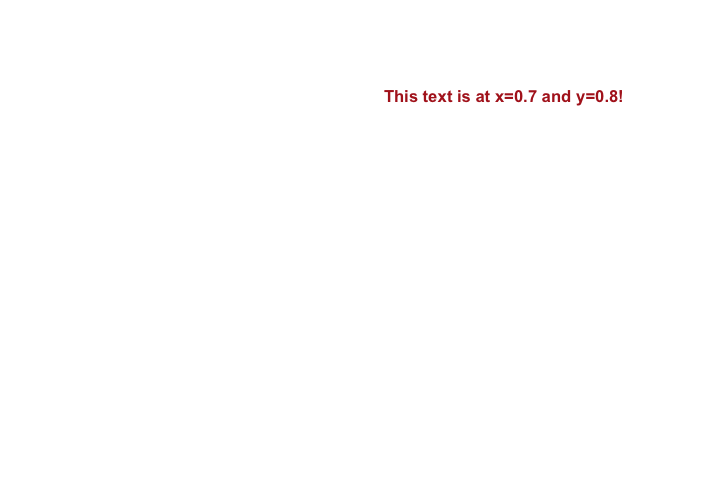

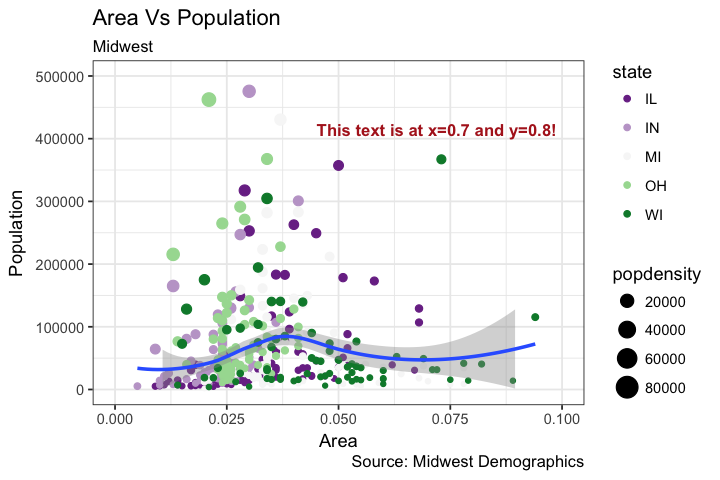

In [129]:
my_text <- "This text is at x=0.7 and y=0.8!"
my_grob <- grid.text(my_text, x=0.7,  y=0.8, gp=gpar(col="firebrick", fontsize=10, fontface="bold"))
gg + annotation_custom(my_grob)

## 反轉 (Flip / Reverse) X / Y 軸

### X / Y 軸對調

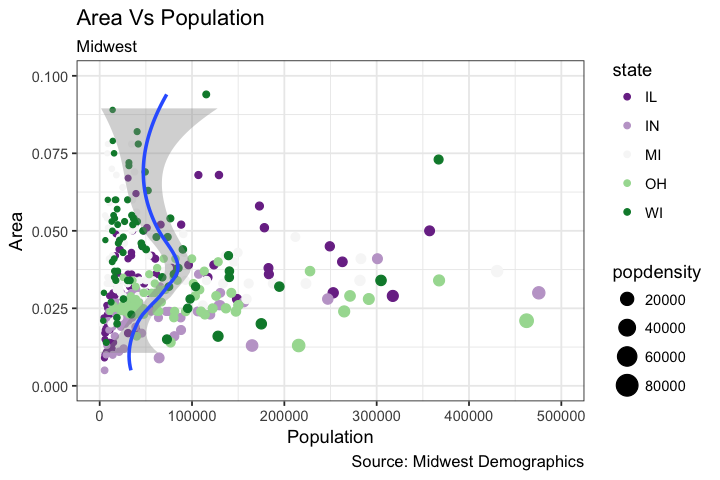

In [130]:
gg + coord_flip()

### 刻度反轉

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


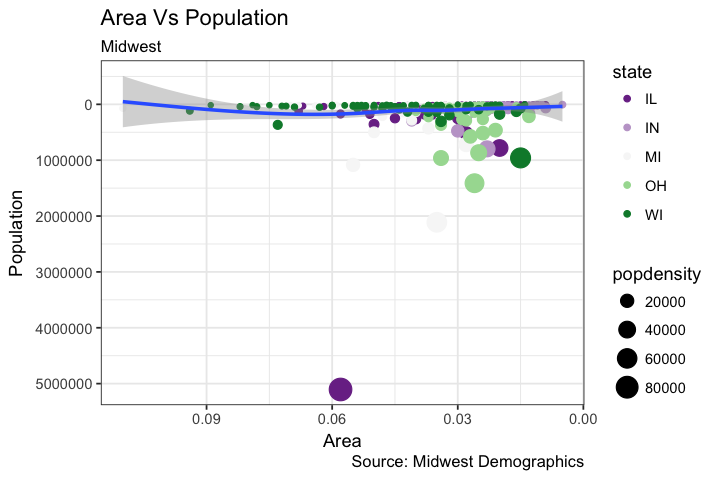

In [131]:
gg + scale_x_reverse() + scale_y_reverse()

## Faceting

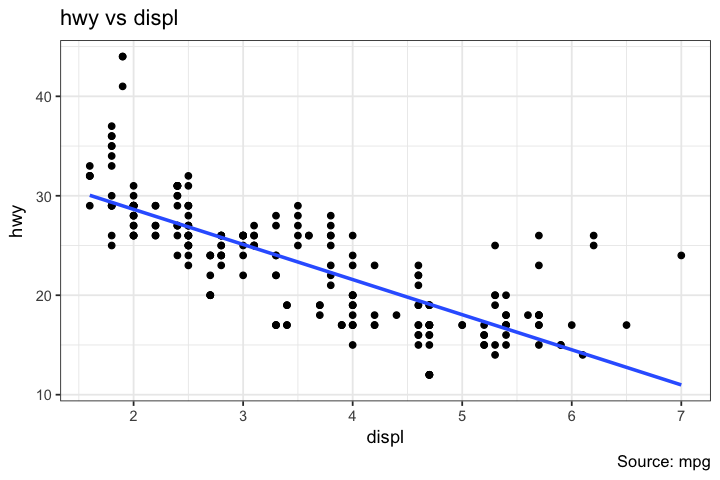

In [134]:
library(ggplot2)
data(mpg, package="ggplot2")  # load data
# mpg <- read.csv("http://goo.gl/uEeRGu")  # alt data source

g <- ggplot(mpg, aes(x=displ, y=hwy)) + 
      geom_point() + 
      labs(title="hwy vs displ", caption = "Source: mpg") +
      geom_smooth(method="lm", se=FALSE) + 
      theme_bw()  # apply bw theme
plot(g)

### Facet Wrap
預設是所有 plot 的 scale 都相同
The items to the left of ~ forms the rows while those to the right form the columns.

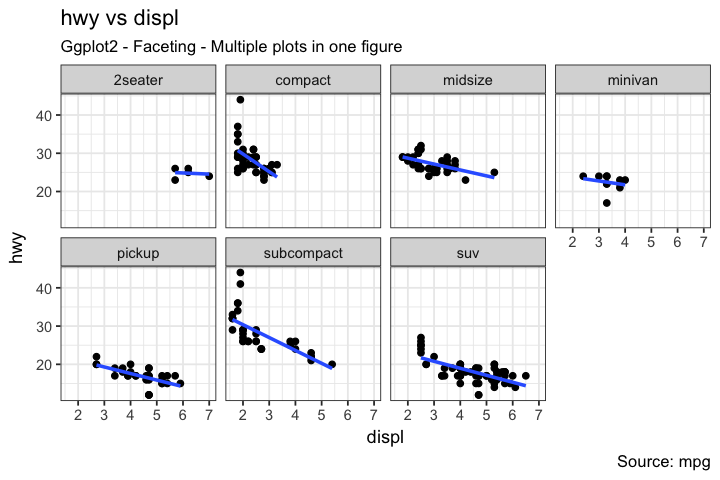

In [138]:
# Facet wrap with common scales
g + facet_wrap( ~ class, nrow=2) + 
    labs(title="hwy vs displ", caption = "Source: mpg", subtitle="Ggplot2 - Faceting - Multiple plots in one figure")  # Shared scales

### 每張 plot 自由刻度
壞處是可能很難比較

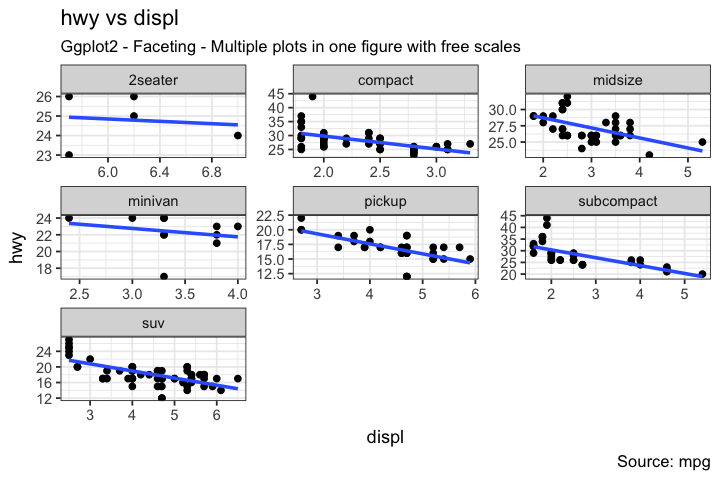

In [140]:
# Facet wrap with free scales
g + facet_wrap( ~ class, scales = "free") + 
    labs(title="hwy vs displ", caption = "Source: mpg", subtitle="Ggplot2 - Faceting - Multiple plots in one figure with free scales")  # Scales free

### Facet Grid
不能選擇 nrow / ncol，但跟 Facet Wrap 相比，能最大化畫圖的空間

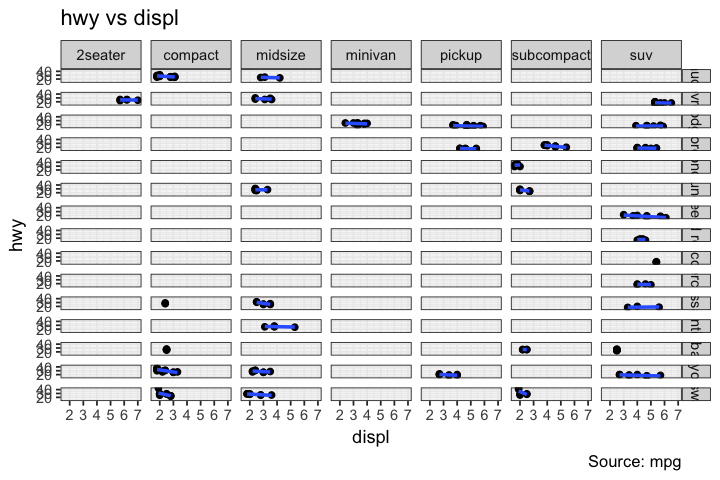

In [141]:
# Add Facet Grid
g1 <- g + facet_grid(manufacturer ~ class)  # manufacturer in rows and class in columns
plot(g1)

## Modifying Plot Background, Major and Minor Axis